In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bad = pd.read_csv("../opencv/data/df_bad.csv", index_col=0) # set first column as index
df_good = pd.read_csv("../opencv/data/df_good.csv", index_col=0) # set first column as index

In [3]:
df_good["label"] = 0
df_bad["label"] = 1

In [4]:
df_bad.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,94,124,0.846603,-2.589851,-2.215973,0.846031,1
2,96,123,0.846122,-2.837860,-0.927490,0.826792,1
3,92,121,0.817107,-2.599693,-2.786713,0.877005,1


In [5]:
df_good.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,89,120,0.989072,-0.577896,-1.580688,0.638711,0
2,105,119,0.941441,-2.540039,-0.858757,0.614961,0
3,89,120,0.968118,-0.905693,-1.525284,0.666339,0


In [6]:
df = pd.concat([df_bad, df_good])
df.sample(4)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
394,190,206,5.003323,-2.862762,53.247772,1.528386,1
302,332,266,0.952349,-24.898830,29.728363,2.537230,1
342,182,200,0.714261,-8.862419,-8.576813,0.995532,0
208,219,189,0.986097,-6.900437,-3.942017,1.168985,0


In [7]:
# df.to_csv("../opencv/data/df.csv")

In [8]:
df.corr()

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
Width,1.000000,0.844207,-0.004413,-0.544154,0.025867,0.413702,0.254726
Height,0.844207,1.000000,-0.007628,-0.301882,0.091593,0.437010,0.387298
Eye2Box,-0.004413,-0.007628,1.000000,0.003241,-0.092577,0.014275,-0.030104
Roll,-0.544154,-0.301882,0.003241,1.000000,0.011580,-0.292431,-0.135549
Yaw,0.025867,0.091593,-0.092577,0.011580,1.000000,0.049483,0.183638
Pitch,0.413702,0.437010,0.014275,-0.292431,0.049483,1.000000,0.393617
label,0.254726,0.387298,-0.030104,-0.135549,0.183638,0.393617,1.000000


In [9]:
list(df.columns)

['Width', 'Height', 'Eye2Box', 'Roll', 'Yaw', 'Pitch', 'label']

In [10]:
df.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,94,124,0.846603,-2.589851,-2.215973,0.846031,1
2,96,123,0.846122,-2.837860,-0.927490,0.826792,1
3,92,121,0.817107,-2.599693,-2.786713,0.877005,1


### Random Forest

In [11]:
y = df["label"]
X = df.drop(['label'], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100, 
    bootstrap=True, 
    max_depth= 50,
    max_features= 'sqrt',
    min_samples_leaf= 1,
    min_samples_split= 2,
)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
accuracy = model.score(X_test, y_test)
accuracy = str(accuracy)
accuracy = accuracy.split(".")[-1]
accuracy

'9325153374233128'

In [15]:
from joblib import dump, load
MODEL_PATH = f"../opencv/sk_random_forest/model_{accuracy[:3]}.joblib"
dump(model, MODEL_PATH) 

['../opencv/sk_random_forest/model_932.joblib']

In [16]:
model_loaded = load(MODEL_PATH) 

In [17]:
y_predicted = model.predict(X_test)

In [18]:
y_predicted_loaded = model_loaded.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[88,  7],
       [ 4, 64]])

Text(69.0, 0.5, 'Truth')

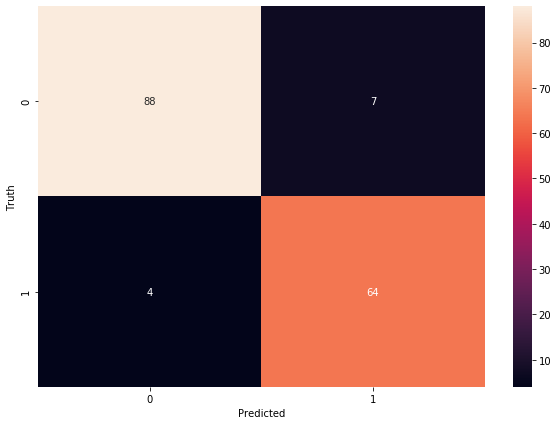

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
